# generate dataset

In [22]:
from scripts.get_top_stocks import *


top_stocks_long, top_stocks_long_short = generate_top_stocks_df()
common_top_stocks = get_common_top_stocks(top_stocks_long, top_stocks_long_short)

/Users/I748920/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



Results saved to 'top_30_stocks_long_only.csv' and 'top_30_stocks_long_short.csv'

Detailed metrics for top stock (Long-Only Strategy) SMCI:
Final Close Price: 284.26
60-day Return: 250.61%
Average Hourly Volatility: 0.6678
Average Sharpe Ratio: 1.6242
Average Hourly Volume: 355714

num common_top_stocks:  35


In [23]:
# specify variables for dataset generation

start_date = '2023-01-01'
end_date = '2024-08-01'
interval = "1h"
trading_days_per_year = 252
hours_per_day = 6.5

In [24]:
from scripts.generate_dataset_features import *


df = get_all_stock_features_df(
    stocks_list=common_top_stocks,
    start_date=start_date,
    end_date=end_date,
    interval=interval,
    trading_days_per_year=trading_days_per_year, 
    hours_per_day=hours_per_day
)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [25]:
def categorize_by_percentile(values,percentile_list):
    # Compute percentiles
    # percentiles = np.percentile(values, [20, 40, 60, 80])
    # percentiles = np.percentile(values, [33,66])
    percentiles = np.percentile(values, percentile_list)
    # percentiles = np.percentile(values, [10,90])
    
    # Define labels
    # labels = ['strong sell', 'sell', 'hold', 'buy', 'strong buy']
    labels = ['sell', 'hold', 'buy']

    # Use pd.cut to bin the values
    categories = pd.cut(values, bins=[-np.inf] + percentiles.tolist() + [np.inf], labels=labels, include_lowest=True)

    # could potentially have issue where 
    
    return categories

In [26]:
def add_target_cols(df):
    new_df = pd.DataFrame()
    
    for stock_name in df.stock_name.unique():
        stock_df = df[df['stock_name']==stock_name]
        stock_df["Stock_Position"] = categorize_by_percentile(stock_df["Log_Return_shift"].to_numpy(),[10,90])
        
        label_mapping = {
            'sell': 0, 
            'hold': 1, 
            'buy': 2, 
        }
        
        stock_df["Target"] = stock_df["Stock_Position"].apply(lambda x:label_mapping[x])
        new_df = pd.concat([new_df,stock_df],ignore_index=True)
    
    return new_df

In [27]:
df = add_target_cols(df)

/var/folders/ff/wvby4kh52j96myw15h33jjk40000gn/T/ipykernel_47881/594597735.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df["Stock_Position"] = categorize_by_percentile(stock_df["Log_Return_shift"].to_numpy(),[10,90])
/var/folders/ff/wvby4kh52j96myw15h33jjk40000gn/T/ipykernel_47881/594597735.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df["Target"] = stock_df["Stock_Position"].apply(lambda x:label_mapping[x])
/var/folders/ff/wvby4kh52j96myw15h33jjk40000gn/T/ipykernel_47881/59459773

In [28]:
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,MACD16,MACD32,MACD64,MACD128,MACD256,FamaFrenchMktReturns,Log_Return_shift,stock_name,Stock_Position,Target
0,2023-02-24 13:30:00-05:00,248.750000,249.199997,248.429993,248.970001,248.970001,1633685,0.000884,-0.046483,0.021409,...,2.734943,1.737437,1.094284,-0.196305,-1.031241,-1.09,0.000361,MSFT,hold,1
1,2023-02-24 14:30:00-05:00,248.979996,249.780502,248.410004,249.059998,249.059998,2069606,0.000361,0.060876,0.117712,...,5.721741,2.390624,1.311781,-0.184651,-1.060666,-1.09,0.000602,MSFT,hold,1
2,2023-02-24 15:30:00-05:00,249.070007,249.490005,248.100006,249.210007,249.210007,3116888,0.000602,0.142467,0.201925,...,33.549533,3.586315,1.621197,-0.174080,-1.100780,-1.09,0.010657,MSFT,buy,2
3,2023-02-27 09:30:00-05:00,252.460007,252.820007,250.759995,251.880005,251.880005,4729065,0.010657,0.164189,0.205479,...,-0.504125,-1.379717,-3.725126,-0.464856,-1.804730,0.31,-0.007412,MSFT,sell,0
4,2023-02-27 10:30:00-05:00,251.869995,252.000000,249.759995,250.020004,250.020004,2939227,-0.007412,-0.112960,-0.233408,...,4.365736,9.274274,3.009783,-0.178657,-1.279218,0.31,0.000400,MSFT,hold,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89829,2024-07-30 10:30:00-04:00,106.635002,107.139999,106.279999,106.650002,106.650002,508329,-0.000656,-0.167953,-0.316181,...,2.294767,0.908176,0.001662,-0.581816,-1.389558,0.68,-0.004134,DASH,hold,1
89830,2024-07-30 11:30:00-04:00,106.644997,106.699997,105.599998,106.209999,106.209999,395329,-0.004134,-0.153831,-0.125047,...,-5.363957,4.099389,0.061416,-0.791684,-1.882878,0.68,-0.002923,DASH,hold,1
89831,2024-07-30 12:30:00-04:00,106.154999,106.379997,105.339996,105.900002,105.900002,309957,-0.002923,-0.144642,-0.121046,...,-1.896640,-4.183979,0.206812,-1.082882,-2.528935,0.68,0.006213,DASH,hold,1
89832,2024-07-30 13:30:00-04:00,105.860001,106.620003,105.760002,106.559998,106.559998,248461,0.006213,-0.132562,-0.110125,...,1.916270,1.421294,0.130609,-0.637149,-1.536890,0.68,0.003279,DASH,hold,1


In [29]:
# additional logic to ensure buy remains +ve and sell remainvs -ve

print(len(df[(df.Log_Return_shift < 0) & (df.Stock_Position == 'buy')]))
# print(len(df[(df.Log_Return_shift < 0) & (df.Stock_Position == 'strong buy')]))

print(len(df[(df.Log_Return_shift > 0) & (df.Stock_Position == 'sell')]))
# print(len(df[(df.Log_Return_shift > 0) & (df.Stock_Position == 'strong sell')]))

# all good

0
0


# preprocess dataset

- set targets correctly (try 3 targets first)
    - plot the distribution pdf of the target values
      
- split train val test on time
    - within each split can shuffle
    - split directly on the df

- shortlist the target and features
** keep the df unchanged so dont need to run above code again

In [32]:
# sort df according to date
df1 = df.sort_values("Datetime").reset_index(drop=True)

# train test split on index
train_size, val_size, test_size = 0.8, 0.1, 0.1
train_size, val_size, test_size = int(len(df1) * train_size), int(len(df1) * val_size), int(len(df1) * test_size)
train_df = df1.iloc[:train_size]
val_df = df1.iloc[train_size:train_size + val_size]
test_df = df1.iloc[train_size + val_size:]

train_df.shape,val_df.shape,test_df.shape

((71867, 84), (8983, 84), (8984, 84))

In [33]:
train_df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,MACD16,MACD32,MACD64,MACD128,MACD256,FamaFrenchMktReturns,Log_Return_shift,stock_name,Stock_Position,Target
0,2023-02-10 12:00:00+00:00,153.437500,153.699997,153.000000,153.085007,153.085007,210932,-0.003243,-0.317099,-0.373950,...,1.165333,0.300798,-0.237521,-0.690568,-1.679347,0.11,0.001730,MKS.L,hold,1
1,2023-02-10 12:00:00+00:00,106.360001,106.639999,106.199997,106.269997,106.269997,1318353,-0.000658,-0.007519,0.045017,...,1.028772,0.136904,-0.029851,-0.186527,-0.638538,0.11,0.004600,RR.L,hold,1
2,2023-02-10 12:00:00+00:00,1619.500000,1625.500000,1615.000000,1625.000000,1625.000000,38967,0.003390,-0.156986,-0.213034,...,29.033343,-0.033365,-1.200842,-4.101547,45.477088,0.11,0.001537,III.L,hold,1
3,2023-02-10 13:00:00+00:00,153.250000,153.899994,153.149994,153.350006,153.350006,206337,0.001730,-0.142110,-0.011012,...,2.664017,0.520411,-0.240000,-0.754125,-1.849107,0.11,0.000326,MKS.L,hold,1
4,2023-02-10 13:00:00+00:00,106.260002,106.980003,106.129997,106.760002,106.760002,859007,0.004600,-0.154064,-0.210965,...,11.923219,0.395658,-0.006902,-0.241713,-0.861859,0.11,0.005232,RR.L,hold,1


In [34]:
df.columns, df.columns[8:-4]

(Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
        'Log_Return', 'EMAVolumeDiff2', 'SMAVolumeDiff2', 'EMACloseDiff2',
        'SMACloseDiff2', 'VWAP2', 'VolatilityStdDev2', 'Volatility2',
        'Momentum2', 'EMAVolumeDiff4', 'SMAVolumeDiff4', 'EMACloseDiff4',
        'SMACloseDiff4', 'VWAP4', 'VolatilityStdDev4', 'Volatility4',
        'Momentum4', 'EMAVolumeDiff8', 'SMAVolumeDiff8', 'EMACloseDiff8',
        'SMACloseDiff8', 'VWAP8', 'VolatilityStdDev8', 'Volatility8',
        'Momentum8', 'EMAVolumeDiff16', 'SMAVolumeDiff16', 'EMACloseDiff16',
        'SMACloseDiff16', 'VWAP16', 'VolatilityStdDev16', 'Volatility16',
        'Momentum16', 'EMAVolumeDiff32', 'SMAVolumeDiff32', 'EMACloseDiff32',
        'SMACloseDiff32', 'VWAP32', 'VolatilityStdDev32', 'Volatility32',
        'Momentum32', 'EMAVolumeDiff64', 'SMAVolumeDiff64', 'EMACloseDiff64',
        'SMACloseDiff64', 'VWAP64', 'VolatilityStdDev64', 'Volatility64',
        'Momentum64', 'EMAVolumeDiff1

# training mtd 1 - using all features

In [36]:
features = df.columns[8:-4]
print(len(features))
target = "Target"

X_train = train_df[features].to_numpy()
y_train = train_df[target].to_numpy()
print(X_train.shape,y_train.shape)

X_val = val_df[features].to_numpy()
y_val = val_df[target].to_numpy()
print(X_val.shape,y_val.shape)

X_test = test_df[features].to_numpy()
y_test = test_df[target].to_numpy()
print(X_test.shape,y_test.shape)

72
(71867, 72) (71867,)
(8983, 72) (8983,)
(8984, 72) (8984,)


In [37]:
set(y_train),set(y_val),set(y_test)

({0, 1, 2}, {0, 1, 2}, {0, 1, 2})

In [38]:
from imblearn.over_sampling import SMOTE

def balance_dataset_with_smote(X, y):
    # Initialize the SMOTE object
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    
    # Apply SMOTE to the dataset
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    return X_resampled, y_resampled

In [39]:
def get_numpy_value_counts(arr):
    unique, counts = np.unique(arr, return_counts=True)
    print(np.asarray((unique, counts)).T)

In [40]:
print(X_train.shape,y_train.shape)
get_numpy_value_counts(y_train)
X_train, y_train = balance_dataset_with_smote(X_train, y_train)
print(X_train.shape,y_train.shape)
get_numpy_value_counts(y_train)

(71867, 72) (71867,)
[[    0  7146]
 [    1 57392]
 [    2  7329]]
(172176, 72) (172176,)
[[    0 57392]
 [    1 57392]
 [    2 57392]]


In [41]:
print(X_val.shape,y_val.shape)
get_numpy_value_counts(y_val)
X_val, y_val = balance_dataset_with_smote(X_val, y_val)
print(X_val.shape,y_val.shape)
get_numpy_value_counts(y_val)

(8983, 72) (8983,)
[[   0  856]
 [   1 7294]
 [   2  833]]
(21882, 72) (21882,)
[[   0 7294]
 [   1 7294]
 [   2 7294]]


In [42]:
# print(X_test.shape,y_test.shape)
# get_numpy_value_counts(y_test)
# X_test, y_test = balance_dataset_with_smote(X_test, y_test)
# print(X_test.shape,y_test.shape)
# get_numpy_value_counts(y_test)

In [43]:
from scripts.train_predict import *

# standardise the values

scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the validation data
X_val = scaler.transform(X_val)

# Transform the test data
X_test = scaler.transform(X_test)

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((172176, 72), (172176,), (21882, 72), (21882,), (8984, 72), (8984,))

In [44]:
X_train[100],y_train[100]

(array([ 2.41110678e+00,  3.45787865e+00, -1.81379168e-01, -3.72938354e-01,
        -3.40369538e-02,  7.93311632e-01, -4.19592816e-02,  5.03653857e-01,
         2.93347320e+00,  1.99780922e+00,  2.42886971e-03,  2.07756261e-02,
         5.55631667e-02,  8.36218162e-01, -4.02259477e-01,  5.45092930e-01,
         2.33352516e+00,  2.20580172e+00,  1.30671871e-01,  1.53457581e-01,
         8.00064377e-02,  6.01606691e-01, -7.72650841e-01,  5.87514315e-01,
         2.14930464e+00,  2.06455047e+00,  2.00293261e-01,  2.20656617e-01,
         1.53356115e-01,  5.34946399e-01, -9.40828061e-01,  6.01778888e-01,
         2.06755138e+00,  1.95922456e+00,  2.17422258e-01,  2.47743770e-01,
         5.05022199e-01,  7.76303018e-01, -1.15604432e+00,  6.11952734e-01,
         2.02478297e+00,  1.94428890e+00,  2.19553626e-01,  1.67411418e-01,
         2.50848137e-01,  4.18456360e-01, -1.27796869e+00,  5.96340327e-01,
         2.00997461e+00,  1.95306231e+00,  3.55160275e-01,  1.43214037e-01,
         2.5

In [45]:
from sklearn.metrics import accuracy_score

def train():
    # initialise training params
    best_score = float('inf')
    best_params = None
    best_model = None
    

    # Define the parameter grid
    param_grid = {
        # 'hidden_layer_sizes': [(8,), (16,), (32,), (64,), (64,8), (64,16,), (32,8), (16,8), (8,16,), (8,64,)], # Different architectures
        # 'activation': ['relu', 'tanh'], # Different activation functions
        # 'solver': ['adam', 'sgd'], # Different solvers
        # 'alpha': [0.0001, 0.001], # Different regularization terms
        # 'learning_rate': ['constant', 'adaptive'], # Different learning rates
        # 'hidden_layer_sizes': [(8,64), (8,4), (8,2), (4,2),(2),(1),(4)], # Different architectures
        'hidden_layer_sizes': [(32)], # Different architectures
        # 'hidden_layer_sizes': [(6, 8, 64, 1), (64, 1)], # Different architectures
        # 'hidden_layer_sizes': [(8,64), (16,64), (32,64), (32, 128)], # Different architectures
        'activation': ['relu'], # Different activation functions
        'solver': ['adam'], # Different solvers
        'alpha': [0.0005], # Different regularization terms
        'learning_rate': ['adaptive'], # Different learning rates
    }

    for params in alive_it(ParameterGrid(param_grid)):
        model = MLPClassifier(max_iter=1000, **params) # initialise new model before each run
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        # score = model.score(y_val, y_pred)
        score,y_pred = predict(model,X_val,y_val)
        
        if score < best_score:
            best_score = score
            best_params = params
            best_model = model
            print(f"score: {round(best_score,7)}")
            # print(f"score: {round(best_score,7)}, params: {best_params}")

    print(f"Best parameters found: {best_params}")
    print(f"Best validation score: {round(best_score,5)}")

    return best_model, best_params, best_score, X_test, y_test

def predict(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    return acc,y_pred

def train_predict():
    best_model, best_params, best_score, X_test, y_test = train()
    acc,y_pred = predict(best_model, X_test, y_test)
    
    return best_model, best_params, best_score, acc, y_pred

In [46]:
best_model, best_params, best_score, acc, y_pred = train_predict()

on 0: score: 0.5337264
|████████████████████████████████████████| 1/1 [100%] in 1:22.1 (0.01/s) 
Best parameters found: {'activation': 'relu', 'alpha': 0.0005, 'hidden_layer_sizes': 32, 'learning_rate': 'adaptive', 'solver': 'adam'}
Best validation score: 0.53373


accuracy: 66.24


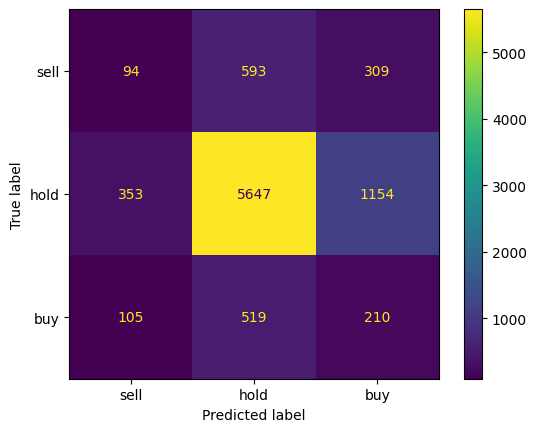

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(f"accuracy: {round(acc*100,2)}")
labels = ['sell', 'hold', 'buy']
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.show()

In [48]:
## predict on indiv stocks
## using all features

for stock_name in test_df.stock_name.unique():
    stock_df = test_df[test_df['stock_name']==stock_name]
    stock_X_test = stock_df[features].to_numpy()
    stock_y_test = stock_df[target].to_numpy()


    stock_preds = best_model.predict(stock_X_test)
    acc = accuracy_score(stock_y_test, stock_preds)

    print(f"{stock_name}: {round(acc*100,2)}")

TSLA: 77.51
WDAY: 86.35
TEAM: 86.35
BKNG: 85.14
AMZN: 79.52
SNPS: 74.3
MRNA: 78.31
ADBE: 82.26
NVDA: 68.55
CRWD: 75.4
MSFT: 83.87
INTU: 79.84
MU: 69.35
META: 80.24
INTC: 85.48
PANW: 78.63
AMAT: 72.98
ABNB: 88.71
DASH: 76.61
DDOG: 84.27
PDD: 83.47
MDB: 82.66
ZS: 81.45
TTD: 83.87
CPRT: 77.82
MELI: 81.45
AMD: 75.81
AVGO: 64.92
LRCX: 73.79
CDNS: 77.02
MRVL: 77.82
SMCI: 78.23
III.L: 78.67
RR.L: 83.0
MKS.L: 83.29


# training mtd 2 - using SelectKBest(10)

In [50]:
features = df.columns[8:-4]
print(len(features))
target = "Target"

X_train = train_df[features].to_numpy()
y_train = train_df[target].to_numpy()
print(X_train.shape,y_train.shape)

X_val = val_df[features].to_numpy()
y_val = val_df[target].to_numpy()
print(X_val.shape,y_val.shape)

X_test = test_df[features].to_numpy()
y_test = test_df[target].to_numpy()
print(X_test.shape,y_test.shape)

72
(71867, 72) (71867,)
(8983, 72) (8983,)
(8984, 72) (8984,)


In [51]:
set(y_train),set(y_val),set(y_test)

({0, 1, 2}, {0, 1, 2}, {0, 1, 2})

In [52]:
from imblearn.over_sampling import SMOTE

def balance_dataset_with_smote(X, y):
    # Initialize the SMOTE object
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    
    # Apply SMOTE to the dataset
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    return X_resampled, y_resampled

In [53]:
def get_numpy_value_counts(arr):
    unique, counts = np.unique(arr, return_counts=True)
    print(np.asarray((unique, counts)).T)

In [54]:
print(X_train.shape,y_train.shape)
get_numpy_value_counts(y_train)
X_train, y_train = balance_dataset_with_smote(X_train, y_train)
print(X_train.shape,y_train.shape)
get_numpy_value_counts(y_train)

(71867, 72) (71867,)
[[    0  7146]
 [    1 57392]
 [    2  7329]]
(172176, 72) (172176,)
[[    0 57392]
 [    1 57392]
 [    2 57392]]


In [55]:
print(X_val.shape,y_val.shape)
get_numpy_value_counts(y_val)
X_val, y_val = balance_dataset_with_smote(X_val, y_val)
print(X_val.shape,y_val.shape)
get_numpy_value_counts(y_val)

(8983, 72) (8983,)
[[   0  856]
 [   1 7294]
 [   2  833]]
(21882, 72) (21882,)
[[   0 7294]
 [   1 7294]
 [   2 7294]]


In [56]:
# print(X_test.shape,y_test.shape)
# get_numpy_value_counts(y_test)
# X_test, y_test = balance_dataset_with_smote(X_test, y_test)
# print(X_test.shape,y_test.shape)
# get_numpy_value_counts(y_test)

In [57]:
from scripts.train_predict import *

# standardise the values and selectKbest
scaler = StandardScaler()
selector = SelectKBest(f_regression, k=10)

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)
X_train = selector.fit_transform(X_train, y_train)

# Transform the validation data
X_val = scaler.transform(X_val)
X_val = selector.transform(X_val)

# Transform the test data
X_test = scaler.transform(X_test)
X_test = selector.transform(X_test)

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((172176, 10), (172176,), (21882, 10), (21882,), (8984, 10), (8984,))

In [58]:
X_train[0],y_train[0]

(array([-0.42302046, -0.41460715,  0.23886243, -0.81189979, -1.05897895,
        -1.15213325,  0.56892323, -1.25066461, -1.23619382,  0.10069516]),
 1)

In [59]:
from sklearn.metrics import accuracy_score

def train():
    # initialise training params
    best_score = float('inf')
    best_params = None
    best_model = None
    

    # Define the parameter grid
    param_grid = {
        # 'hidden_layer_sizes': [(8,), (16,), (32,), (64,), (64,8), (64,16,), (32,8), (16,8), (8,16,), (8,64,)], # Different architectures
        # 'activation': ['relu', 'tanh'], # Different activation functions
        # 'solver': ['adam', 'sgd'], # Different solvers
        # 'alpha': [0.0001, 0.001], # Different regularization terms
        # 'learning_rate': ['constant', 'adaptive'], # Different learning rates
        # 'hidden_layer_sizes': [(8,64), (8,4), (8,2), (4,2),(2),(1),(4)], # Different architectures
        'hidden_layer_sizes': [(32)], # Different architectures
        # 'hidden_layer_sizes': [(6, 8, 64, 1), (64, 1)], # Different architectures
        # 'hidden_layer_sizes': [(8,64), (16,64), (32,64), (32, 128)], # Different architectures
        'activation': ['relu'], # Different activation functions
        'solver': ['adam'], # Different solvers
        'alpha': [0.0005], # Different regularization terms
        'learning_rate': ['adaptive'], # Different learning rates
    }

    for params in alive_it(ParameterGrid(param_grid)):
        model = MLPClassifier(max_iter=1000, **params) # initialise new model before each run
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        # score = model.score(y_val, y_pred)
        score,y_pred = predict(model,X_val,y_val)
        
        if score < best_score:
            best_score = score
            best_params = params
            best_model = model
            print(f"score: {round(best_score,7)}")
            # print(f"score: {round(best_score,7)}, params: {best_params}")

    print(f"Best parameters found: {best_params}")
    print(f"Best validation score: {round(best_score,5)}")

    return best_model, best_params, best_score, X_test, y_test

def predict(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    return acc,y_pred

def train_predict():
    best_model, best_params, best_score, X_test, y_test = train()
    acc,y_pred = predict(best_model, X_test, y_test)
    
    return best_model, best_params, best_score, acc, y_pred

In [60]:
best_model, best_params, best_score, acc, y_pred = train_predict()

on 0: score: 0.4892149
|████████████████████████████████████████| 1/1 [100%] in 15.2s (0.07/s) 
Best parameters found: {'activation': 'relu', 'alpha': 0.0005, 'hidden_layer_sizes': 32, 'learning_rate': 'adaptive', 'solver': 'adam'}
Best validation score: 0.48921


accuracy: 55.24


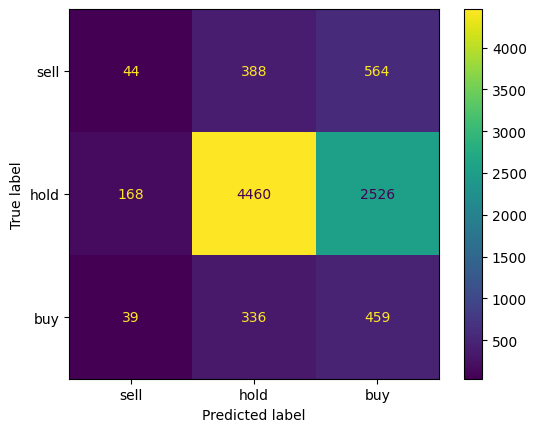

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(f"accuracy: {round(acc*100,2)}")
labels = ['sell', 'hold', 'buy']
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.show()

In [62]:
## predict on indiv stocks
## selectKbest only

for stock_name in test_df.stock_name.unique():
    stock_df = test_df[test_df['stock_name']==stock_name]
    stock_X_test = stock_df[features].to_numpy()
    stock_y_test = stock_df[target].to_numpy()
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_X_test = selector.transform(stock_X_test)
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_preds = best_model.predict(stock_X_test)
    acc = accuracy_score(stock_y_test, stock_preds)

    print(f"{stock_name}: {round(acc*100,2)}")

TSLA: 77.51
WDAY: 86.75
TEAM: 86.35
BKNG: 85.14
AMZN: 79.52
SNPS: 74.7
MRNA: 78.31
ADBE: 82.26
NVDA: 68.55
CRWD: 75.81
MSFT: 84.27
INTU: 80.65
MU: 70.97
META: 80.24
INTC: 85.48
PANW: 78.63
AMAT: 73.39
ABNB: 88.71
DASH: 76.61
DDOG: 84.27
PDD: 83.47
MDB: 82.66
ZS: 82.26
TTD: 83.87
CPRT: 77.82
MELI: 81.45
AMD: 76.21
AVGO: 64.92
LRCX: 74.19
CDNS: 77.02
MRVL: 78.23
SMCI: 78.63
III.L: 78.67
RR.L: 83.57
MKS.L: 83.57


# training mtd 3 - using PCA(0.95)

In [64]:
features = df.columns[8:-4]
print(len(features))
target = "Target"

X_train = train_df[features].to_numpy()
y_train = train_df[target].to_numpy()
print(X_train.shape,y_train.shape)

X_val = val_df[features].to_numpy()
y_val = val_df[target].to_numpy()
print(X_val.shape,y_val.shape)

X_test = test_df[features].to_numpy()
y_test = test_df[target].to_numpy()
print(X_test.shape,y_test.shape)

72
(71867, 72) (71867,)
(8983, 72) (8983,)
(8984, 72) (8984,)


In [65]:
set(y_train),set(y_val),set(y_test)

({0, 1, 2}, {0, 1, 2}, {0, 1, 2})

In [66]:
from imblearn.over_sampling import SMOTE

def balance_dataset_with_smote(X, y):
    # Initialize the SMOTE object
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    
    # Apply SMOTE to the dataset
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    return X_resampled, y_resampled

In [67]:
def get_numpy_value_counts(arr):
    unique, counts = np.unique(arr, return_counts=True)
    print(np.asarray((unique, counts)).T)

In [68]:
print(X_train.shape,y_train.shape)
get_numpy_value_counts(y_train)
X_train, y_train = balance_dataset_with_smote(X_train, y_train)
print(X_train.shape,y_train.shape)
get_numpy_value_counts(y_train)

(71867, 72) (71867,)
[[    0  7146]
 [    1 57392]
 [    2  7329]]
(172176, 72) (172176,)
[[    0 57392]
 [    1 57392]
 [    2 57392]]


In [69]:
print(X_val.shape,y_val.shape)
get_numpy_value_counts(y_val)
X_val, y_val = balance_dataset_with_smote(X_val, y_val)
print(X_val.shape,y_val.shape)
get_numpy_value_counts(y_val)

(8983, 72) (8983,)
[[   0  856]
 [   1 7294]
 [   2  833]]
(21882, 72) (21882,)
[[   0 7294]
 [   1 7294]
 [   2 7294]]


In [70]:
# print(X_test.shape,y_test.shape)
# get_numpy_value_counts(y_test)
# X_test, y_test = balance_dataset_with_smote(X_test, y_test)
# print(X_test.shape,y_test.shape)
# get_numpy_value_counts(y_test)

In [71]:
from scripts.train_predict import *

# standardise the values and selectKbest
scaler = StandardScaler()
pca = PCA(n_components = 0.95)

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)
X_train = pca.fit_transform(X_train)

# Transform the validation data
X_val = scaler.transform(X_val)
X_val = pca.transform(X_val)

# Transform the test data
X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((172176, 25), (172176,), (21882, 25), (21882,), (8984, 25), (8984,))

In [72]:
X_train[0],y_train[0]

(array([-5.14339713e+00, -3.21555607e+00,  6.61529415e-01, -1.69228996e+00,
        -2.90431361e-01,  1.28586087e+00,  2.52889088e+00, -5.21779439e-01,
         1.38499454e-01,  4.57231611e-03,  2.10398150e-02, -5.46752134e-02,
         1.22469881e-02, -3.49496195e-02, -1.88307228e-01, -1.94390546e-01,
         1.04730961e+00,  1.09442696e+00,  3.07615236e-02,  5.29935052e-01,
        -6.52779040e-01,  5.67422218e-02,  2.63239848e-01,  2.73086304e-01,
        -7.46281396e-01]),
 1)

In [73]:
from sklearn.metrics import accuracy_score

def train():
    # initialise training params
    best_score = float('inf')
    best_params = None
    best_model = None
    

    # Define the parameter grid
    param_grid = {
        # 'hidden_layer_sizes': [(8,), (16,), (32,), (64,), (64,8), (64,16,), (32,8), (16,8), (8,16,), (8,64,)], # Different architectures
        # 'activation': ['relu', 'tanh'], # Different activation functions
        # 'solver': ['adam', 'sgd'], # Different solvers
        # 'alpha': [0.0001, 0.001], # Different regularization terms
        # 'learning_rate': ['constant', 'adaptive'], # Different learning rates
        # 'hidden_layer_sizes': [(8,64), (8,4), (8,2), (4,2),(2),(1),(4)], # Different architectures
        'hidden_layer_sizes': [(32)], # Different architectures
        # 'hidden_layer_sizes': [(6, 8, 64, 1), (64, 1)], # Different architectures
        # 'hidden_layer_sizes': [(8,64), (16,64), (32,64), (32, 128)], # Different architectures
        'activation': ['relu'], # Different activation functions
        'solver': ['adam'], # Different solvers
        'alpha': [0.0005], # Different regularization terms
        'learning_rate': ['adaptive'], # Different learning rates
    }

    for params in alive_it(ParameterGrid(param_grid)):
        model = MLPClassifier(max_iter=1000, **params) # initialise new model before each run
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        # score = model.score(y_val, y_pred)
        score,y_pred = predict(model,X_val,y_val)
        
        if score < best_score:
            best_score = score
            best_params = params
            best_model = model
            print(f"score: {round(best_score,7)}")
            # print(f"score: {round(best_score,7)}, params: {best_params}")

    print(f"Best parameters found: {best_params}")
    print(f"Best validation score: {round(best_score,5)}")

    return best_model, best_params, best_score, X_test, y_test

def predict(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    return acc,y_pred

def train_predict():
    best_model, best_params, best_score, X_test, y_test = train()
    acc,y_pred = predict(best_model, X_test, y_test)
    
    return best_model, best_params, best_score, acc, y_pred

In [74]:
best_model, best_params, best_score, acc, y_pred = train_predict()

on 0: score: 0.4864729
|████████████████████████████████████████| 1/1 [100%] in 17.6s (0.06/s) 
Best parameters found: {'activation': 'relu', 'alpha': 0.0005, 'hidden_layer_sizes': 32, 'learning_rate': 'adaptive', 'solver': 'adam'}
Best validation score: 0.48647


accuracy: 58.58


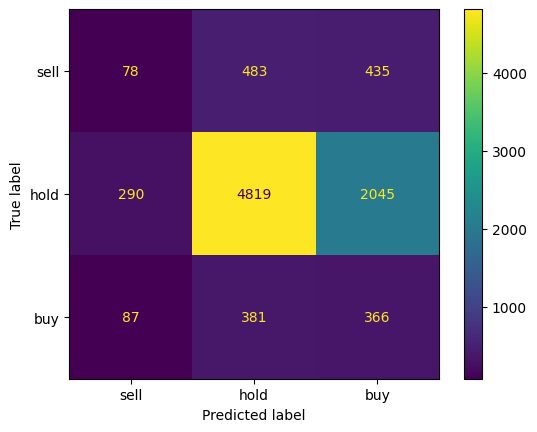

In [75]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(f"accuracy: {round(acc*100,2)}")
labels = ['sell', 'hold', 'buy']
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.show()

In [76]:
## predict on indiv stocks
## pca transformed features only

for stock_name in test_df.stock_name.unique():
    stock_df = test_df[test_df['stock_name']==stock_name]
    stock_X_test = stock_df[features].to_numpy()
    stock_y_test = stock_df[target].to_numpy()
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_X_test = pca.transform(stock_X_test)
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_preds = best_model.predict(stock_X_test)
    acc = accuracy_score(stock_y_test, stock_preds)

    print(f"{stock_name}: {round(acc*100,2)}")

TSLA: 74.3
WDAY: 85.54
TEAM: 83.13
BKNG: 85.14
AMZN: 71.08
SNPS: 74.3
MRNA: 76.31
ADBE: 81.05
NVDA: 68.15
CRWD: 73.79
MSFT: 82.66
INTU: 79.84
MU: 68.55
META: 77.82
INTC: 77.42
PANW: 76.61
AMAT: 72.18
ABNB: 79.44
DASH: 69.76
DDOG: 76.61
PDD: 79.03
MDB: 82.66
ZS: 78.63
TTD: 72.18
CPRT: 67.74
MELI: 81.05
AMD: 72.18
AVGO: 61.69
LRCX: 73.79
CDNS: 75.4
MRVL: 72.58
SMCI: 78.63
III.L: 78.1
RR.L: 81.56
MKS.L: 80.69


# use model to predict on individual stocks

In [78]:
best_model

MLPClassifier(alpha=0.0005, hidden_layer_sizes=32, learning_rate='adaptive',
              max_iter=1000)

In [79]:
for stock_name in test_df.stock_name.unique():
    stock_df = test_df[test_df['stock_name']==stock_name]
    stock_X_test = stock_df[features].to_numpy()
    stock_y_test = stock_df[target].to_numpy()
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_X_test = pca.transform(stock_X_test)
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_preds = best_model.predict(stock_X_test)
    acc = accuracy_score(stock_y_test, stock_preds)

    print(f"{stock_name}: {round(acc*100,2)}")

TSLA: 74.3
WDAY: 85.54
TEAM: 83.13
BKNG: 85.14
AMZN: 71.08
SNPS: 74.3
MRNA: 76.31
ADBE: 81.05
NVDA: 68.15
CRWD: 73.79
MSFT: 82.66
INTU: 79.84
MU: 68.55
META: 77.82
INTC: 77.42
PANW: 76.61
AMAT: 72.18
ABNB: 79.44
DASH: 69.76
DDOG: 76.61
PDD: 79.03
MDB: 82.66
ZS: 78.63
TTD: 72.18
CPRT: 67.74
MELI: 81.05
AMD: 72.18
AVGO: 61.69
LRCX: 73.79
CDNS: 75.4
MRVL: 72.58
SMCI: 78.63
III.L: 78.1
RR.L: 81.56
MKS.L: 80.69
